In this noteook, I plot the ROC curve and calculate the AUC score for each model. I also made separate plots for the best and final models.

In [11]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [12]:
X_train_sc = pd.read_csv('X_train_sc.csv')
X_val_sc = pd.read_csv('X_val_sc.csv')
y_train_enc = np.ravel(pd.read_csv('y_train_enc.csv'))
y_val_enc = np.ravel(pd.read_csv('y_val_enc.csv'))

#make train and val customer id frames and drop from data
X_train_id = X_train_sc['customerid']
X_train_sc.drop('customerid',axis=1,inplace=True)
X_val_id = X_val_sc['customerid']
X_val_sc.drop('customerid',axis=1,inplace=True)

X_test_sc = pd.read_csv('X_test_sc.csv')
y_test_enc = pd.read_csv('y_test_enc.csv')

X_test_id = X_test_sc['customerid']
X_test_sc.drop('customerid',axis=1,inplace=True)

Plotting function. Takes a list of estimators to fit and predict on.

In [14]:
def plot_auc(estimator,X_train,y_train,X_val,y_val,title):
    #fit est
    fprs = []
    tprs = []
    threshs = []
    aucs = []
    
    for est in estimator:
        est = est[1]
        est.fit(X_train,y_train)
        
        
        try:
            y_val_pred = est.predict_proba(X_val)
            
            fpr, tpr, thresh = roc_curve(y_val, y_val_pred[:,1])
            auc = roc_auc_score(y_val, y_val_pred[:,1])
            fprs.append(fpr)
            tprs.append(tpr)
            threshs.append(thresh)
            aucs.append(auc)
        except:
            y_val_pred = est.decision_function(X_val)
            fpr, tpr, thresh = roc_curve(y_val, y_val_pred)
            auc = roc_auc_score(y_val, y_val_pred)
            fprs.append(fpr)
            tprs.append(tpr)
            threshs.append(thresh)
            aucs.append(auc)
    
    #plot the val curve
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax = plt.style.use('seaborn-dark')
    ax = plt.xlabel('fpr',fontsize=20)
    ax = plt.ylabel('tpr',fontsize=20)
    for i in range(len(fprs)):
        
        
        ax = plt.plot(fprs[i],tprs[i],label=f'{estimator[i][0]} auc: {round(aucs[i],2)}')
        ax = plt.legend(fontsize=14)
        ax = plt.title(title,fontsize=20)

    
    

In [15]:
#load models
first_lr = load('models/1stlr.joblib')
second_lr = load('models/2ndlr.joblib')
third_lr = load('models/3rdlr.joblib')
best_lr = load('models/best_lr.joblib')
best_lr3 = load('models/best_lr3.joblib')
best_ridge = load('models/best_ridge.joblib')
etree = load('models/etree.joblib')
knn = load('models/knn.joblisb')
nb = load('models/nb.joblib')
rfr = load('models/rfr.joblib')
sgd = load('models/sgd.joblib')
svc = load('models/svc.joblib')
tree = load('models/tree.joblib')
xgb = load('models/xgb.joblib')
ada = load('models/ada.joblib')
stack = load('models/stack.joblib')
lr_bag = load('models/lr_bag.joblib')
ridge_bag = load('models/ridge_bag.joblib')

In [16]:
estimators = [('First lr',first_lr),
             ('Second lr',second_lr),
             ('Third lr',third_lr),
             ('Best lr',best_lr),
             ('Best ridge',best_ridge),
             ('Ridge bag',ridge_bag),
             ('Extra trees',etree),
             ('KNN',knn),
             ('Naive Bayes',nb),
             ('Random forest',rfr),
             ('SGD',sgd),
             ('SVC',svc),
             ('Dec.Trees',tree),
             ('XGB',xgb),
             ('Adaboost',ada),
             ('Stack',stack),
             ('Bagged lr',lr_bag),
             ]

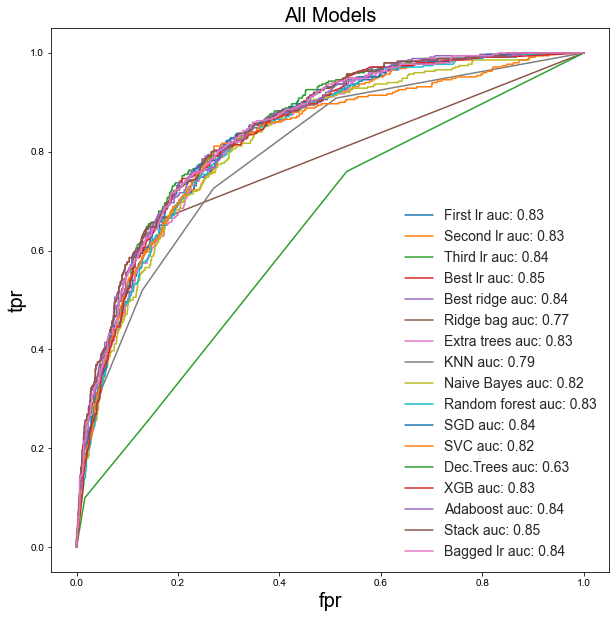

In [6]:
plot_auc(estimators,X_train_sc,y_train_enc,X_val_sc,y_val_enc,'All Models')

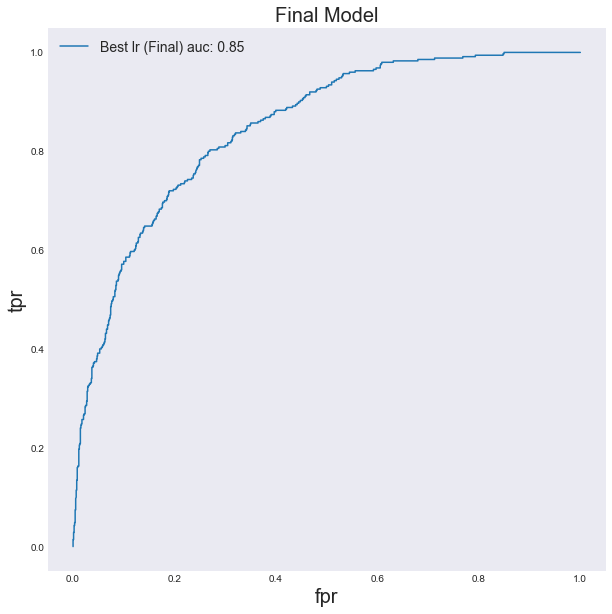

In [9]:
best_lr = load('models/best_lr.joblib')

estimators = [('Best lr (Final)',best_lr)]

plot_auc(estimators,X_train_sc,y_train_enc,X_val_sc,y_val_enc,'Final Model')

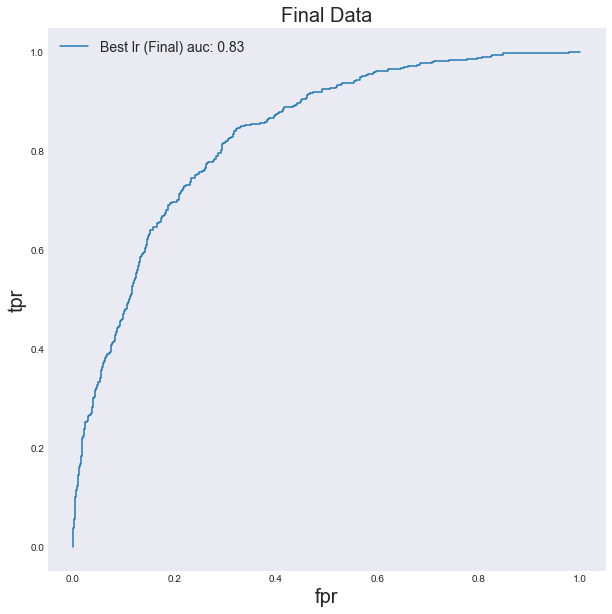

In [10]:
plot_auc(estimators,X_train_sc,y_train_enc,X_test_sc,y_test_enc,'Final Data')